In [1]:
import requests  #to query the API 
import re  #regular expressions
import pandas as pd   # for dataframes
import json

import sklearn
from sklearn.feature_extraction.text import CountVectorizer  
 

In [5]:
df = pd.read_csv('HeadlineSources.csv', usecols = [1,2])

In [9]:
for columns in df.columns:
    df[columns] = df[columns].str.lower()

In [10]:
df

,Source,Headline
0,abc-news,lawsuit been filed against ohio house bill whi...
1,abc-news,missouri bill would make felony offense school...
2,abc-news,england national health service banned puberty...
3,abc-news,nassau county executive bruce blakeman filed l...
4,abc-news,office argues that order clear violation york ...
...,...,...
591,daily signal,president biden delivered state union address ...
592,catholicnewsagency.com,maine state house augusta credit wangkun shutt...
593,reason,surreptitious steps draw carter appointee deep...
594,new york post,biden administration also taken steps remove m...


In [28]:
sources = df.Source.value_counts()

In [46]:
s_df = pd.DataFrame(sources.reset_index())
s_df = s_df.rename(columns = {"index":"source","Source":"count"})

In [47]:
s_df.head(20)

,source,count
0,abc-news,96
1,fox-news,47
2,advocate.com,41
3,minneapolis star tribune,26
4,nbc-news,25
5,the daily caller,21
6,breitbart-news,19
7,daily signal,18
8,truthout,16
9,newsweek,15


In [50]:
#just going to use the top 8 news sources. 
top6= s_df.iloc[0:7, 0]
top6 = top6.tolist()
top6

['abc-news',
 'fox-news',
 'advocate.com',
 'minneapolis star tribune',
 'nbc-news',
 'the daily caller',
 'breitbart-news']

In [81]:
top_hl_df = df[df["Source"].isin(top6)]


In [82]:
print(len(df))
print(len(top_hl_df))

596
275


In [103]:
top_hl_df.to_csv('top6_HL.csv', index = 0)

In [123]:
top_hl_df = top_hl_df.reset_index().drop(columns = "index")

In [124]:
labeled_headlines = top_hl_df.dropna()

X = labeled_headlines.Headline.str.lower()
Y = labeled_headlines.Source.str.lower()
print(type(X))

<class 'pandas.core.series.Series'>


In [125]:
for item in X:
    print(item)
    item.split(" ")
    break

lawsuit been filed against ohio house bill which bans gender affirming medical care transgender minors


In [126]:
MyCountV = CountVectorizer(input="content", lowercase=True, stop_words = "english")
MyDTM = MyCountV.fit_transform(X)  # create a sparse matrix

In [127]:
vocab = MyCountV.get_feature_names_out()  # change to a list

MyDTM = MyDTM.toarray()  # convert to a regular array

MyDTM_DF=pd.DataFrame(MyDTM,columns=vocab)

In [128]:
print(MyDTM_DF.head())

   abbott  abortion  abortions  abuse  abusing  abusive  academy  access  \
0       0         0          0      0        0        0        0       0   
1       0         0          0      0        0        0        0       0   
2       0         0          0      0        0        0        0       0   
3       0         0          0      0        0        0        0       0   
4       0         0          0      0        0        0        0       0   

   accomplishe  according  ...  works  world  writer  wyoming  year  years  \
0            0          0  ...      0      0       0        0     0      0   
1            0          0  ...      0      0       0        0     0      0   
2            0          0  ...      0      0       0        0     0      0   
3            0          0  ...      0      0       0        0     0      0   
4            0          0  ...      0      0       0        0     0      0   

   york  young  youth  youths  
0     0      0      0       0  
1     0   

In [129]:
'''RemoveWords=['access', 'adults', 'affirming', 'barriers', 'bisexual', 'breast', 'cancer',
       'care', 'challenges', 'cisgender', 'clinical', 'community', 'diverse', 'dysphoria', 'education', 'evidence',
       'experience', 'face', 'factors', 'findings', 'gay', 'gender', 'health', 'healthcare', 'high', 'hiv',
       'hormone', 'identify', 'identity', 'impact', 'inclusive',
       'individual', 'knowledge', 'lack', 'lesbian', 'lgbtq', 'life', 'medical', 'men', 'mental', 'older',
       'online', 'outcomes', 'population',
       'potential', 'prep', 'providers', 'quality', 'queer', 'reported', 'risk', 'services', 'sex', 'social', 'specific', 'stigma', 'studies', 'study', 'support', 'therapy', 'treatment', 'use', 'women',
       'youth']'''

for nextcol in MyDTM_DF.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)): ## removes everything not a-z, A-Z, or-
        MyDTM_DF =MyDTM_DF.drop([nextcol], axis=1)
    elif(len(str(nextcol))<3): ## remove words shorter than 3 chars
        #print(nextcol)
        MyDTM_DF =MyDTM_DF.drop([nextcol], axis=1)
    elif(len(str(nextcol))>10): ## remove words larger than 15 chars
        #print(nextcol)
        MyDTM_DF= MyDTM_DF.drop([nextcol], axis=1)
    #elif(nextcol not in RemoveWords): ## remove anything outside of these specific words
    #    MyDTM_DF= MyDTM_DF.drop([nextcol], axis=1)
    #print(nextcol)

print(len(MyDTM_DF.columns))

1395


In [130]:
MyDTM_DF.columns

Index(['abbott', 'abortion', 'abortions', 'abuse', 'abusing', 'abusive',
       'academy', 'access', 'according', 'account',
       ...
       'works', 'world', 'writer', 'wyoming', 'year', 'years', 'york', 'young',
       'youth', 'youths'],
      dtype='object', length=1395)

In [131]:
#print(MyCountV.stop_words)

#import nltk
#from nltk.corpus import stopwords
 
#nltk.download('stopwords')
#stoplist = stopwords.words('english')
#print(stoplist)

In [132]:
#print(len(stoplist))
#"against" might be useful for sentiment analysis

In [133]:
# Defining a list of values to remove from the original list
#remove_list = ['bill', 'cry', 'he', 'him', 'her', 'hers', 'him', 'his', 'they', 'their', 'them', 'serious', 'who', 'whoever', 'whom']
 
# Creating a new list with all values from the original list
# that are not in the remove list
#res = [x for x in stoplist if x not in remove_list]
 
# Updating the original list to be the new list of values
#stoplist[:] = res
 
# Printing the updated original list
#print(len(stoplist))

In [134]:
#MyDTM_DF.loc['Total'] = MyDTM_DF.sum()

In [135]:
#print(MyDTM_DF.loc['Total'])

In [136]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import os
import re
import shutil

from nltk.stem import WordNetLemmatizer 
LEMMER = WordNetLemmatizer() 

import nltk
nltk.download('wordnet')

from nltk.stem.porter import PorterStemmer
STEMMER=PorterStemmer()


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [137]:

def MY_LEMMER(str_input):
    words = re.sub(r"[^A-Za-z\-]", " ", str_input).lower().split()
    words = [LEMMER.lemmatize(word) for word in words]
    return words

print(MY_LEMMER("Hiking is loved by hikers and hikes!! 1234"))


['hiking', 'is', 'loved', 'by', 'hiker', 'and', 'hike']


In [138]:


MyVect_LEM=CountVectorizer(input='content',
                        analyzer = 'word',
                        stop_words='english',
                        tokenizer=MY_LEMMER,
                        lowercase = True,
                        #max_features=10
                        )


Vect_LEM = MyVect_LEM.fit_transform(X)
ColumnNames_lem=MyVect_LEM.get_feature_names_out()
DF_LEM=pd.DataFrame(Vect_LEM.toarray(),columns=ColumnNames_lem)
print(DF_LEM)

     abbott  abortion  abuse  abusing  abusive  academy  access  accomplishe  \
0         0         0      0        0        0        0       0            0   
1         0         0      0        0        0        0       0            0   
2         0         0      0        0        0        0       0            0   
3         0         0      0        0        0        0       0            0   
4         0         0      0        0        0        0       0            0   
..      ...       ...    ...      ...      ...      ...     ...          ...   
269       0         0      0        0        0        0       0            0   
270       0         0      0        0        0        0       0            0   
271       0         0      0        0        0        0       0            0   
272       0         0      0        0        0        0       0            0   
273       0         0      0        0        0        0       0            0   

     according  account  ...  work  wor

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [139]:
DF_LEM['Source'] = Y

In [140]:
DF_LEM

,abbott,abortion,abuse,abusing,abusive,academy,access,accomplishe,according,account,...,worked,worker,world,writer,wyoming,year,york,young,youth,Source
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,abc-news
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,abc-news
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,abc-news
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,abc-news
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,abc-news
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,advocate.com
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,advocate.com
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nbc-news
272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,advocate.com


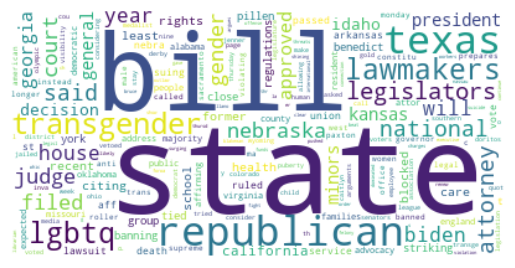

In [143]:
!pip install WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import csv
import re
text1 = labeled_headlines['Headline'].to_string(index=False).lower()
text1 = text1.replace('\n', " ")
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text1)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [144]:
DF_LEM.to_csv("topHL_LEMM_DF.csv")